### Avance 4
#### Baseline

Estudiantes:

- Carlos Alberto Reynoso Gonzalez. A01793188
- Israel Campos

- Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.
- Comparar el rendimiento de los modelos obtenidos.
- Seleccionar los dos modelos que proporcionen el mejor rendimiento.
- Ajustar los dos mejores modelos.
- Elegir el modelo individual final.
 

#### Desarrollo


Para el desarrollo de la actividad se realizo un busqueda extensive de modelos que puede realizar la tarea img2img (imagen a imagen)

Los siguientes modelos es ecogieron por la razon abajo descritas:

### UNet
✅ Rápido y eficiente  
✅ Fácil de entrenar  
❌ Puede perder detalles en segmentos pequeños  

### UNet++
✅ Más preciso que UNet  
✅ Mejora el flujo de gradientes con conexiones densas  
❌ Más pesado y más lento  

### ResNetFCN
✅ Aprovecha ResNet para extracción de características  
✅ Buena generalización  
❌ Puede perder información espacial  

### SegNet
✅ Más ligero que UNet y DeepLab  
✅ Bueno en tareas rápidas  
❌ Menos preciso en segmentos finos  


In [5]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader, random_split
from torchvision import transforms
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Se importan los modelos y la clase de base de datos

In [23]:
from torch_db import StressDataset
from models import UNet,ResNetFCN,SegNet,UNetPlusPlus # los modelos a probar se importas del archivo models.py de este mismo repositorio

se importa la data

In [7]:


# Path to the root folder containing subfolders
root_folder = "db/"

# Define transformations (e.g., resize images, normalize them, etc.)
transform_pipeline = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 128x128 pixels
    transforms.ToTensor()          # Convert to a PyTorch tensor
])

# Create an instance of the dataset
dataset = StressDataset(root_folder=root_folder, transform=transform_pipeline)



db/hstrips\1
db/hstrips\10
db/hstrips\2
db/hstrips\3
db/hstrips\4
db/hstrips\5
db/hstrips\6
db/hstrips\7
db/hstrips\8
db/hstrips\9
db/random\1
db/random\10
db/random\11
db/random\12
db/random\13
db/random\14
db/random\15
db/random\16
db/random\17
db/random\18
db/random\19
db/random\2
db/random\20
db/random\21
db/random\22
db/random\23
db/random\24
db/random\25
db/random\26
db/random\27
db/random\28
db/random\29
db/random\3
db/random\30
db/random\4
db/random\5
db/random\6
db/random\7
db/random\8
db/random\9
db/vstrips\31
db/vstrips\32
db/vstrips\33
db/vstrips\34
db/vstrips\35
db/vstrips\36
db/vstrips\37
db/vstrips\38
db/vstrips\39
db/vstrips\40
db/vstrips\41


Para observar y confirmar la correcta importancion, visualizamos las matrices. A la izquierda esta la matriz de entrada y a la derecha la de salida que buscaremos predicr a traves del modelo

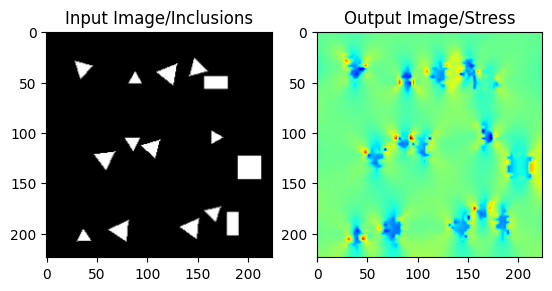

min 73.16007995605469 , avg 125.22615051269531 , max 183.36460876464844


In [8]:

i=6
in_=dataset[i][0][0,:,:]
out=dataset[i][1][0,:,:]
#plot 2x1 grid
fig, axs = plt.subplots(1, 2)
axs[0].imshow(in_, cmap='gray')
axs[0].set_title('Input Image/Inclusions')
axs[1].imshow(out, cmap='jet')
axs[1].set_title('Output Image/Stress')
plt.show()
print(f'min {out.min()} , avg {out.mean()} , max {out.max()}')


Confirmada la importacion partimos la base de datos entre entrenamiento y validacion

In [9]:


# Define the split ratio
val_ratio = 0.2  # 20% for validation
dataset_length = len(dataset)
val_len = int(val_ratio * dataset_length)
train_len = dataset_length - val_len

# Split the dataset
train_dataset, val_dataset = random_split(dataset, [train_len, val_len])


In [10]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

Posteriormente, creamos la instancia de los modelos y definimos la funcion de perdida y el optimizador.

In [11]:
unet = UNet()

unetpp = UNetPlusPlus()

resnet = ResNetFCN()

segnet = SegNet()

c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\carlo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.

In [15]:
criterion = nn.MSELoss()  # Or SmoothL1Loss()

In [16]:
optimizer_unet = torch.optim.Adam(unet.parameters())
optimizer_unetpp = torch.optim.Adam(unetpp.parameters())
optimizer_resnet = torch.optim.Adam(resnet.parameters())
optimizer_segnet = torch.optim.Adam(segnet.parameters())

In [17]:
models=[unet,unetpp,resnet,segnet]
optimizers=[optimizer_unet,optimizer_unetpp,optimizer_resnet,optimizer_segnet]

Iniciamos el entrenamiento para todos los modelos, de manera secuencial

In [11]:

train_losses_list = [[],[],[],[]]
val_losses_list = [[],[],[],[]]


for model, optimizer,train_losses,val_losses in zip(models,optimizers,train_losses_list,val_losses_list):
    print(f"Training {model.__class__.__name__}")



    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU if available

    num_epochs = 100
    batch_size = 4  # Assuming batch size is 4

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for mask, output in train_loader:
            mask, output = mask.to(device), output.to(device)  # Move data to the same device
            output = output  # Normalize ground truth

            pred = model(mask)  # Forward pass
            loss = criterion(output, pred)  # Compute loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        with torch.no_grad():
            val_loss = 0.0
            for mask, output in val_loader:
                mask, output = mask.to(device), output.to(device)
                output = output  # Normalize ground truth

                pred = model(mask)
                loss = criterion(output, pred)

                val_loss += loss.item()

            val_loss /= len(val_loader)
            val_losses.append(val_loss)

        # Print progress every 10 epochs
        
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Training UNet
Epoch 1/100: Train Loss: 307.8120 | Val Loss: 125.5748
Epoch 2/100: Train Loss: 39.9275 | Val Loss: 87.0070
Epoch 3/100: Train Loss: 34.4141 | Val Loss: 33.3732
Epoch 4/100: Train Loss: 24.9296 | Val Loss: 32.8796
Epoch 5/100: Train Loss: 24.1914 | Val Loss: 25.1701
Epoch 6/100: Train Loss: 20.6630 | Val Loss: 22.1553
Epoch 7/100: Train Loss: 18.4940 | Val Loss: 20.4908
Epoch 8/100: Train Loss: 18.4383 | Val Loss: 20.0144
Epoch 9/100: Train Loss: 17.3006 | Val Loss: 21.1893
Epoch 10/100: Train Loss: 18.1319 | Val Loss: 16.6713
Epoch 11/100: Train Loss: 15.4542 | Val Loss: 16.9185
Epoch 12/100: Train Loss: 15.0646 | Val Loss: 20.0429
Epoch 13/100: Train Loss: 15.9449 | Val Loss: 17.0121
Epoch 14/100: Train Loss: 15.0920 | Val Loss: 15.5641
Epoch 15/100: Train Loss: 14.9704 | Val Loss: 14.3929
Epoch 16/100: Train Loss: 13.7934 | Val Loss: 14.3216
Epoch 17/100: Train Loss: 12.7042 | Val Loss: 13.3684
Epoch 18/100: Train Loss: 12.6067 | Val Loss: 13.7521
Epoch 19/100: Train L

Es posible observar que el modelo convencional Unet y su modificacion Unett++ tuvieron un mejor rendimiento durante el entrenamineto alcanzado valores mas bajos en menos epochs.

Por otro lado la red ResNETFCN parece haberse quedado estancada al no mostrar casi nada de progreso despues del epoch 20.

Finalmente, la red SegNet mostro un progreso constante y sostenido pero sin alcanzar los valores de las Unet.

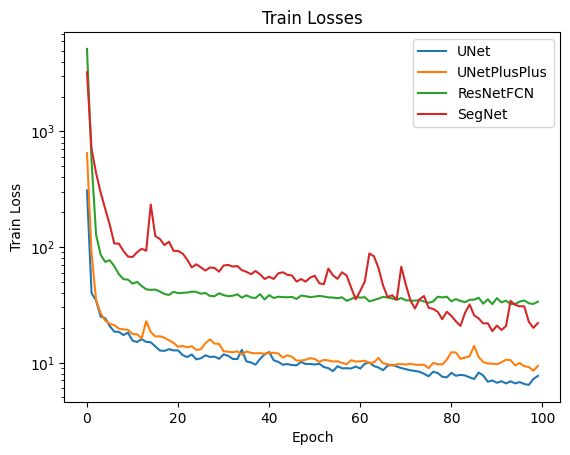

In [19]:
#plot train losses, 1 plot for all
fig, ax = plt.subplots()
for train_losses in train_losses_list:
    ax.plot(train_losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Losses')
#sadd legend

ax.set_yscale('log')
plt.legend([model.__class__.__name__ for model in models])
plt.show()


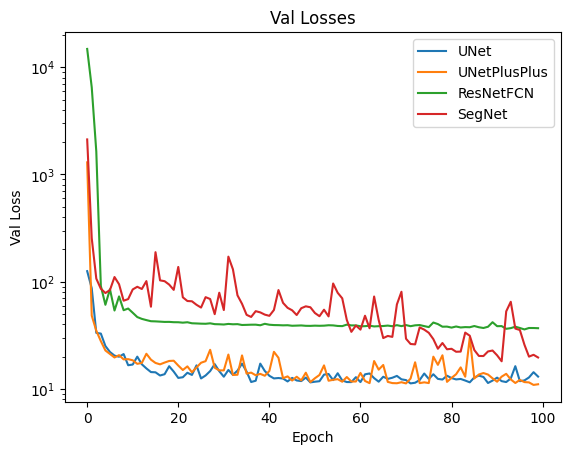

In [22]:
fig, ax = plt.subplots()
for val_losses in val_losses_list:
    ax.plot(val_losses)
ax.set_xlabel('Epoch')
ax.set_ylabel('Val Loss')
ax.set_title('Val Losses')
#sadd legend

ax.set_yscale('log')
plt.legend([model.__class__.__name__ for model in models])
plt.show()


In [13]:
#store val and train losses
torch.save(train_losses_list, 'train_losses_list.pt')
torch.save(val_losses_list, 'val_losses_list.pt')

In [ ]:

train_losses_list = torch.load('models/train_losses_list.pt')
val_losses_list = torch.load('models/val_losses_list.pt')

C:\Users\carlo\AppData\Local\Temp\ipykernel_34828\512726827.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_losses_list = torch.load('models/train_losses_list.pt')

In [22]:
#store models
torch.save(unet.state_dict(), 'unet.pth')
torch.save(unetpp.state_dict(), 'unetpp.pth')
torch.save(resnet.state_dict(), 'resnet.pth')
torch.save(segnet.state_dict(), 'segnet.pth')


In [23]:
#load model to check
unet_loaded = UNet()
unet_loaded.load_state_dict(torch.load('unet.pth'))
unet_loaded.eval()

unetpp_loaded = UNetPlusPlus()
unetpp_loaded.load_state_dict(torch.load('unetpp.pth'))
unetpp_loaded.eval()

resnet_loaded = ResNetFCN()
resnet_loaded.load_state_dict(torch.load('resnet.pth'))
resnet_loaded.eval()

segnet_loaded = SegNet()
segnet_loaded.load_state_dict(torch.load('segnet.pth'))
segnet_loaded.eval()



C:\Users\carlo\AppData\Local\Temp\ipykernel_17648\3506497526.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  unet_loaded.load_state_dict(torch.load('unet.pth'))
C:\Users

SegNet(
  (encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 2

In [29]:
for model in [unet_loaded,unetpp_loaded,resnet_loaded,segnet_loaded]:
    # Initialize metric storage
    train_metrics = {"MAE": [], "RMSE": [], "R2": []}
    val_metrics = {"MAE": [], "RMSE": [], "R2": []}
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Ensure the model is on the correct device

    # Set model to evaluation mode
    model.eval()

    # Loop through the dataset
    for i, (mask, output) in enumerate(val_dataset):
        mask = mask.unsqueeze(0).to(device)  # Add batch dimension & move to GPU/CPU
        output = output.unsqueeze(0).to(device)  # Move to GPU/CPU
        
        with torch.no_grad():  # Disable gradient tracking
            pred = model(mask)  # Forward pass

        # Convert tensors to numpy & move them back to CPU
        output_np = output.cpu().numpy().flatten()  # Ensure this is on CPU
        pred_np   = pred.cpu().numpy().flatten()   # Ensure this is on CPU

        # Compute metrics
        mae  = mean_absolute_error(output_np, pred_np)
        mse  = mean_squared_error(output_np, pred_np)  # Compute MSE first
        rmse = np.sqrt(mse)  # Manually calculate RMSE
        r2   = r2_score(output_np, pred_np)

        # Store metrics
        val_metrics["MAE"].append(mae)
        val_metrics["RMSE"].append(rmse)
        val_metrics["R2"].append(r2)

    # Average metrics
    val_mae  = np.mean(val_metrics["MAE"])
    val_rmse = np.mean(val_metrics["RMSE"])
    val_r2   = np.mean(val_metrics["R2"])
    print(f"Model: {model.__class__.__name__}")
    print(f"Validation MAE: {val_mae:.2f}")
    print(f"Validation RMSE: {val_rmse:.2f}")
    print(f"Validation R2: {val_r2:.2f}")
    print('-----------------------------------')


Model: UNet
Validation MAE: 1.66
Validation RMSE: 3.45
Validation R2: 0.71
-----------------------------------
Model: UNetPlusPlus
Validation MAE: 1.58
Validation RMSE: 3.18
Validation R2: 0.76
-----------------------------------
Model: ResNetFCN
Validation MAE: 3.97
Validation RMSE: 5.84
Validation R2: 0.16
-----------------------------------
Model: SegNet
Validation MAE: 2.38
Validation RMSE: 4.33
Validation R2: 0.51
-----------------------------------


Usando las metricas MAE, RMSE y R2, confirmamos que las redes con mayor rendimiento fueron la UNEt y Unet++.

Tambien usando las dispersiones de valores reales y predichos, confirmamos que las prediciones de las redes ResNEt y SegNet fueron en teoria aleatorias.

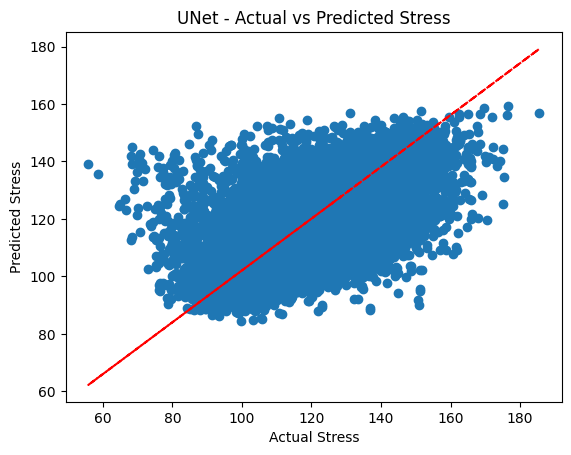

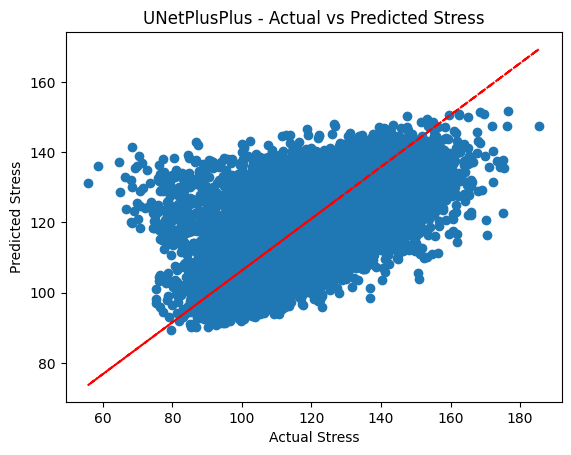

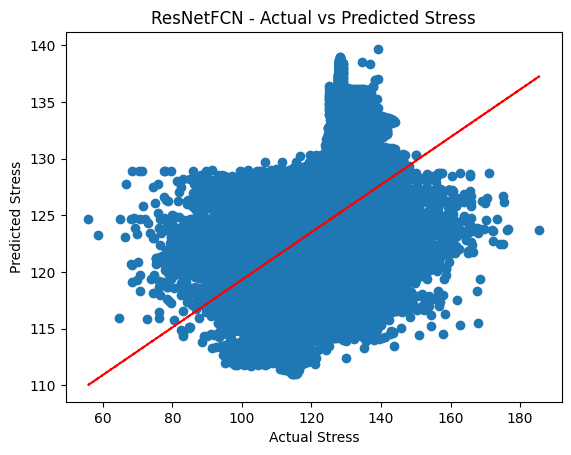

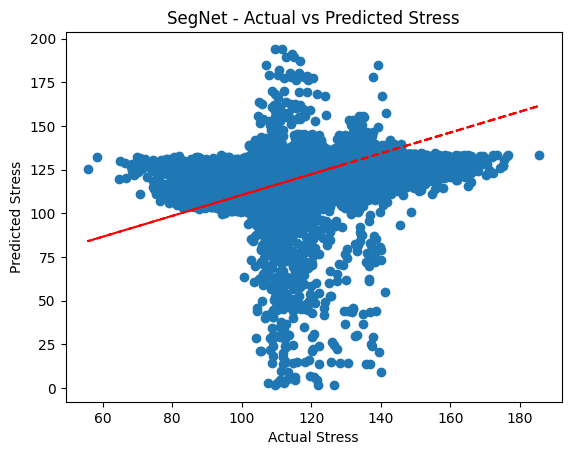

In [32]:
for model in [unet_loaded,unetpp_loaded,resnet_loaded,segnet_loaded]:
    stress_actual=[]
    stress_pred=[]


    model.to(device)
    # Set model to evaluation mode
    model.eval()

    # Loop through the dataset
    for i, (mask, output) in enumerate(val_dataset):
        mask = mask.unsqueeze(0).to(device)  # Add batch dimension & move to GPU/CPU
        output = output.unsqueeze(0).to(device)  # Move to GPU/CPU

        with torch.no_grad():  # Disable gradient tracking
            pred = model(mask)

        output_np = output.cpu().numpy()[0,0,:,:].flatten()
        pred_np = pred.cpu().numpy()[0,0,:,:].flatten()

        #convert np to list
        output_np=output_np.tolist()
        pred_np=pred_np.tolist()

        stress_actual.extend(output_np)
        stress_pred.extend(pred_np)

    plt.scatter(stress_actual, stress_pred)
    z = np.polyfit(stress_actual, stress_pred, 1)
    p = np.poly1d(z)
    plt.plot(stress_actual,p(stress_actual),"r--")
    plt.xlabel('Actual Stress')
    plt.ylabel('Predicted Stress')
    plt.title(f'{model.__class__.__name__} - Actual vs Predicted Stress')
    plt.show()

Para finalizar, generamos la matriz de estres usando cada uno de los modelos para comparar lo patrones de estres de cada uno.

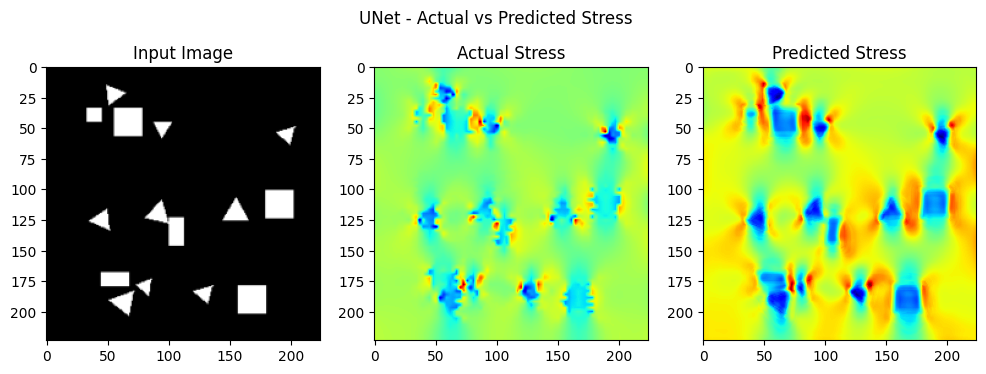

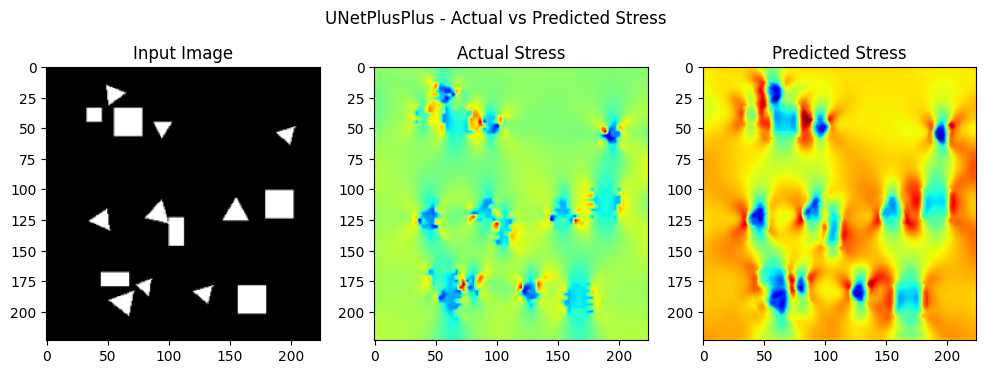

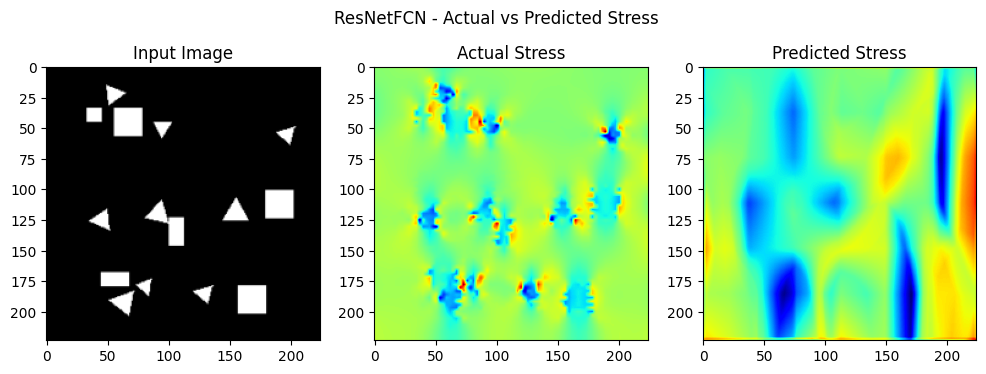

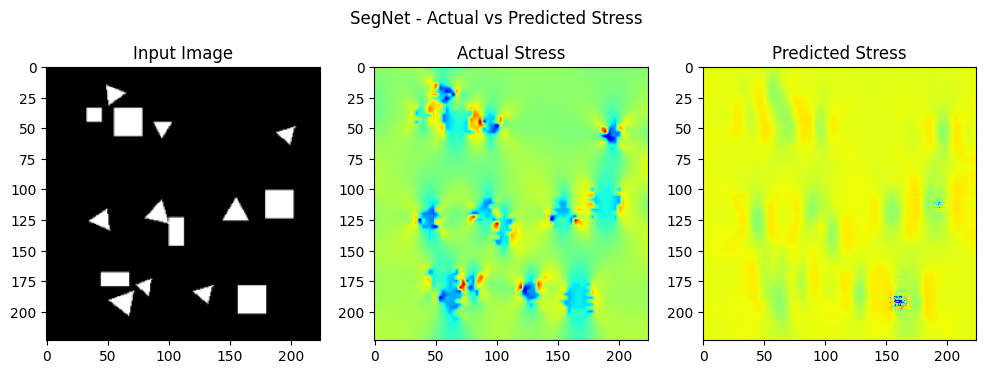

In [49]:
for model in [unet_loaded,unetpp_loaded,resnet_loaded,segnet_loaded]:
    mask = dataset[i][0].unsqueeze(0).to(device)
    mask = dataset[i][0].unsqueeze(0).to(device)
    output = dataset[i][1].unsqueeze(0).to(device)

    with torch.no_grad():  # Ensure no gradients are computed
        pred = model(mask)

    # Convert tensors to NumPy after moving to CPU
    mask_np = mask.cpu().numpy()
    output_np = output.cpu().numpy() 
    pred_np = pred.cpu().numpy() 

    # Plot 3x1 grid
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    #title
    fig.suptitle(f'{model.__class__.__name__} - Actual vs Predicted Stress')
    axs[0].imshow(mask_np[0, 0, :, :], cmap='gray')
    axs[0].set_title('Input Image')

    axs[1].imshow(output_np[0, 0, :, :], cmap='jet')
    axs[1].set_title('Actual Stress')

    axs[2].imshow(pred_np[0, 0, :, :], cmap='jet')
    axs[2].set_title('Predicted Stress')

    plt.show()


### Conclusiones


Se evaluaron cuatro modelos distintos para la tarea de predicción de imágenes de estrés a partir de imágenes de entrada.
UNet y UNet++ destacaron con los mejores resultados en las métricas de rendimiento (MAE, RMSE y R²), logrando una convergencia más rápida y estabilidad en el entrenamiento.
ResNetFCN mostró una limitación significativa en el aprendizaje, ya que su desempeño se estancó después de aproximadamente 20 épocas sin mejoras relevantes.
SegNet tuvo una evolución estable pero no alcanzó la precisión obtenida por UNet y UNet++.
Comparación de las Predicciones

Los modelos UNet y UNet++ generaron mapas de estrés más detallados y con menor dispersión en comparación con los valores reales.
ResNetFCN y SegNet mostraron predicciones menos consistentes, con una mayor dispersión en la comparación entre valores reales y predichos, lo que sugiere que sus predicciones fueron más aleatorias.
Visualización y Validación

La visualización de los mapas de estrés permitió confirmar que los patrones generados por UNet y UNet++ fueron más precisos y alineados con los valores reales.
La dispersión de los valores predichos versus los valores reales confirmó que UNet y UNet++ lograron capturar mejor la relación entre las variables de entrada y salida.
Selección del Modelo Final

Basado en las métricas y la evaluación visual, UNet++ se perfila como la mejor opción debido a su precisión mejorada sobre UNet, a pesar de ser un modelo más pesado.
En caso de requerir un modelo más liviano con una precisión similar, UNet sigue siendo una alternativa viable.